<a href="https://colab.research.google.com/github/puskuriharish/Electricity-Price-Prediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression


In [2]:
import pandas as pd

# Define the file path of the dataset
file_path = 'Household energy bill data.csv'  # Replace with the actual path

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(file_path)


In [3]:
# Generate synthetic dataset (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [4]:
# head
print("Dataset Preview:")
data.head()

Dataset Preview:


,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [5]:
# tail
print("Dataset Preview:")
data.tail()

Dataset Preview:


,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314
999,1,6,835.43,0,0,0,22204.00,0,1,537.801005


In [6]:
# info
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [7]:
print("Number of Rows and Columns:")
print(data.shape)


Number of Rows and Columns:
(1000, 10)


In [8]:
# finding the  missing values
print("Null Values in the Dataset:")
print(data.isnull().sum())


Null Values in the Dataset:
num_rooms             0
num_people            0
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
is_urban              0
amount_paid           0
dtype: int64


In [9]:
# Statistical overview of the dataset
print("Statistical Summary of the Dataset:")
print(data.describe())


Statistical Summary of the Dataset:
         num_rooms   num_people    housearea        is_ac        is_tv  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.962000     4.897000   794.703420     0.376000     0.798000   
std       1.030348     2.007591   147.771736     0.484622     0.401693   
min      -1.000000    -1.000000   244.400000     0.000000     0.000000   
25%       1.000000     4.000000   691.037500     0.000000     1.000000   
50%       2.000000     5.000000   789.970000     0.000000     1.000000   
75%       3.000000     6.000000   892.955000     1.000000     1.000000   
max       5.000000    11.000000  1189.120000     1.000000     1.000000   

           is_flat  ave_monthly_income  num_children     is_urban  amount_paid  
count  1000.000000         1000.000000   1000.000000  1000.000000  1000.000000  
mean      0.477000        24684.986550      1.078000     0.608000   600.396359  
std       0.499721         9678.228224      0.934232  

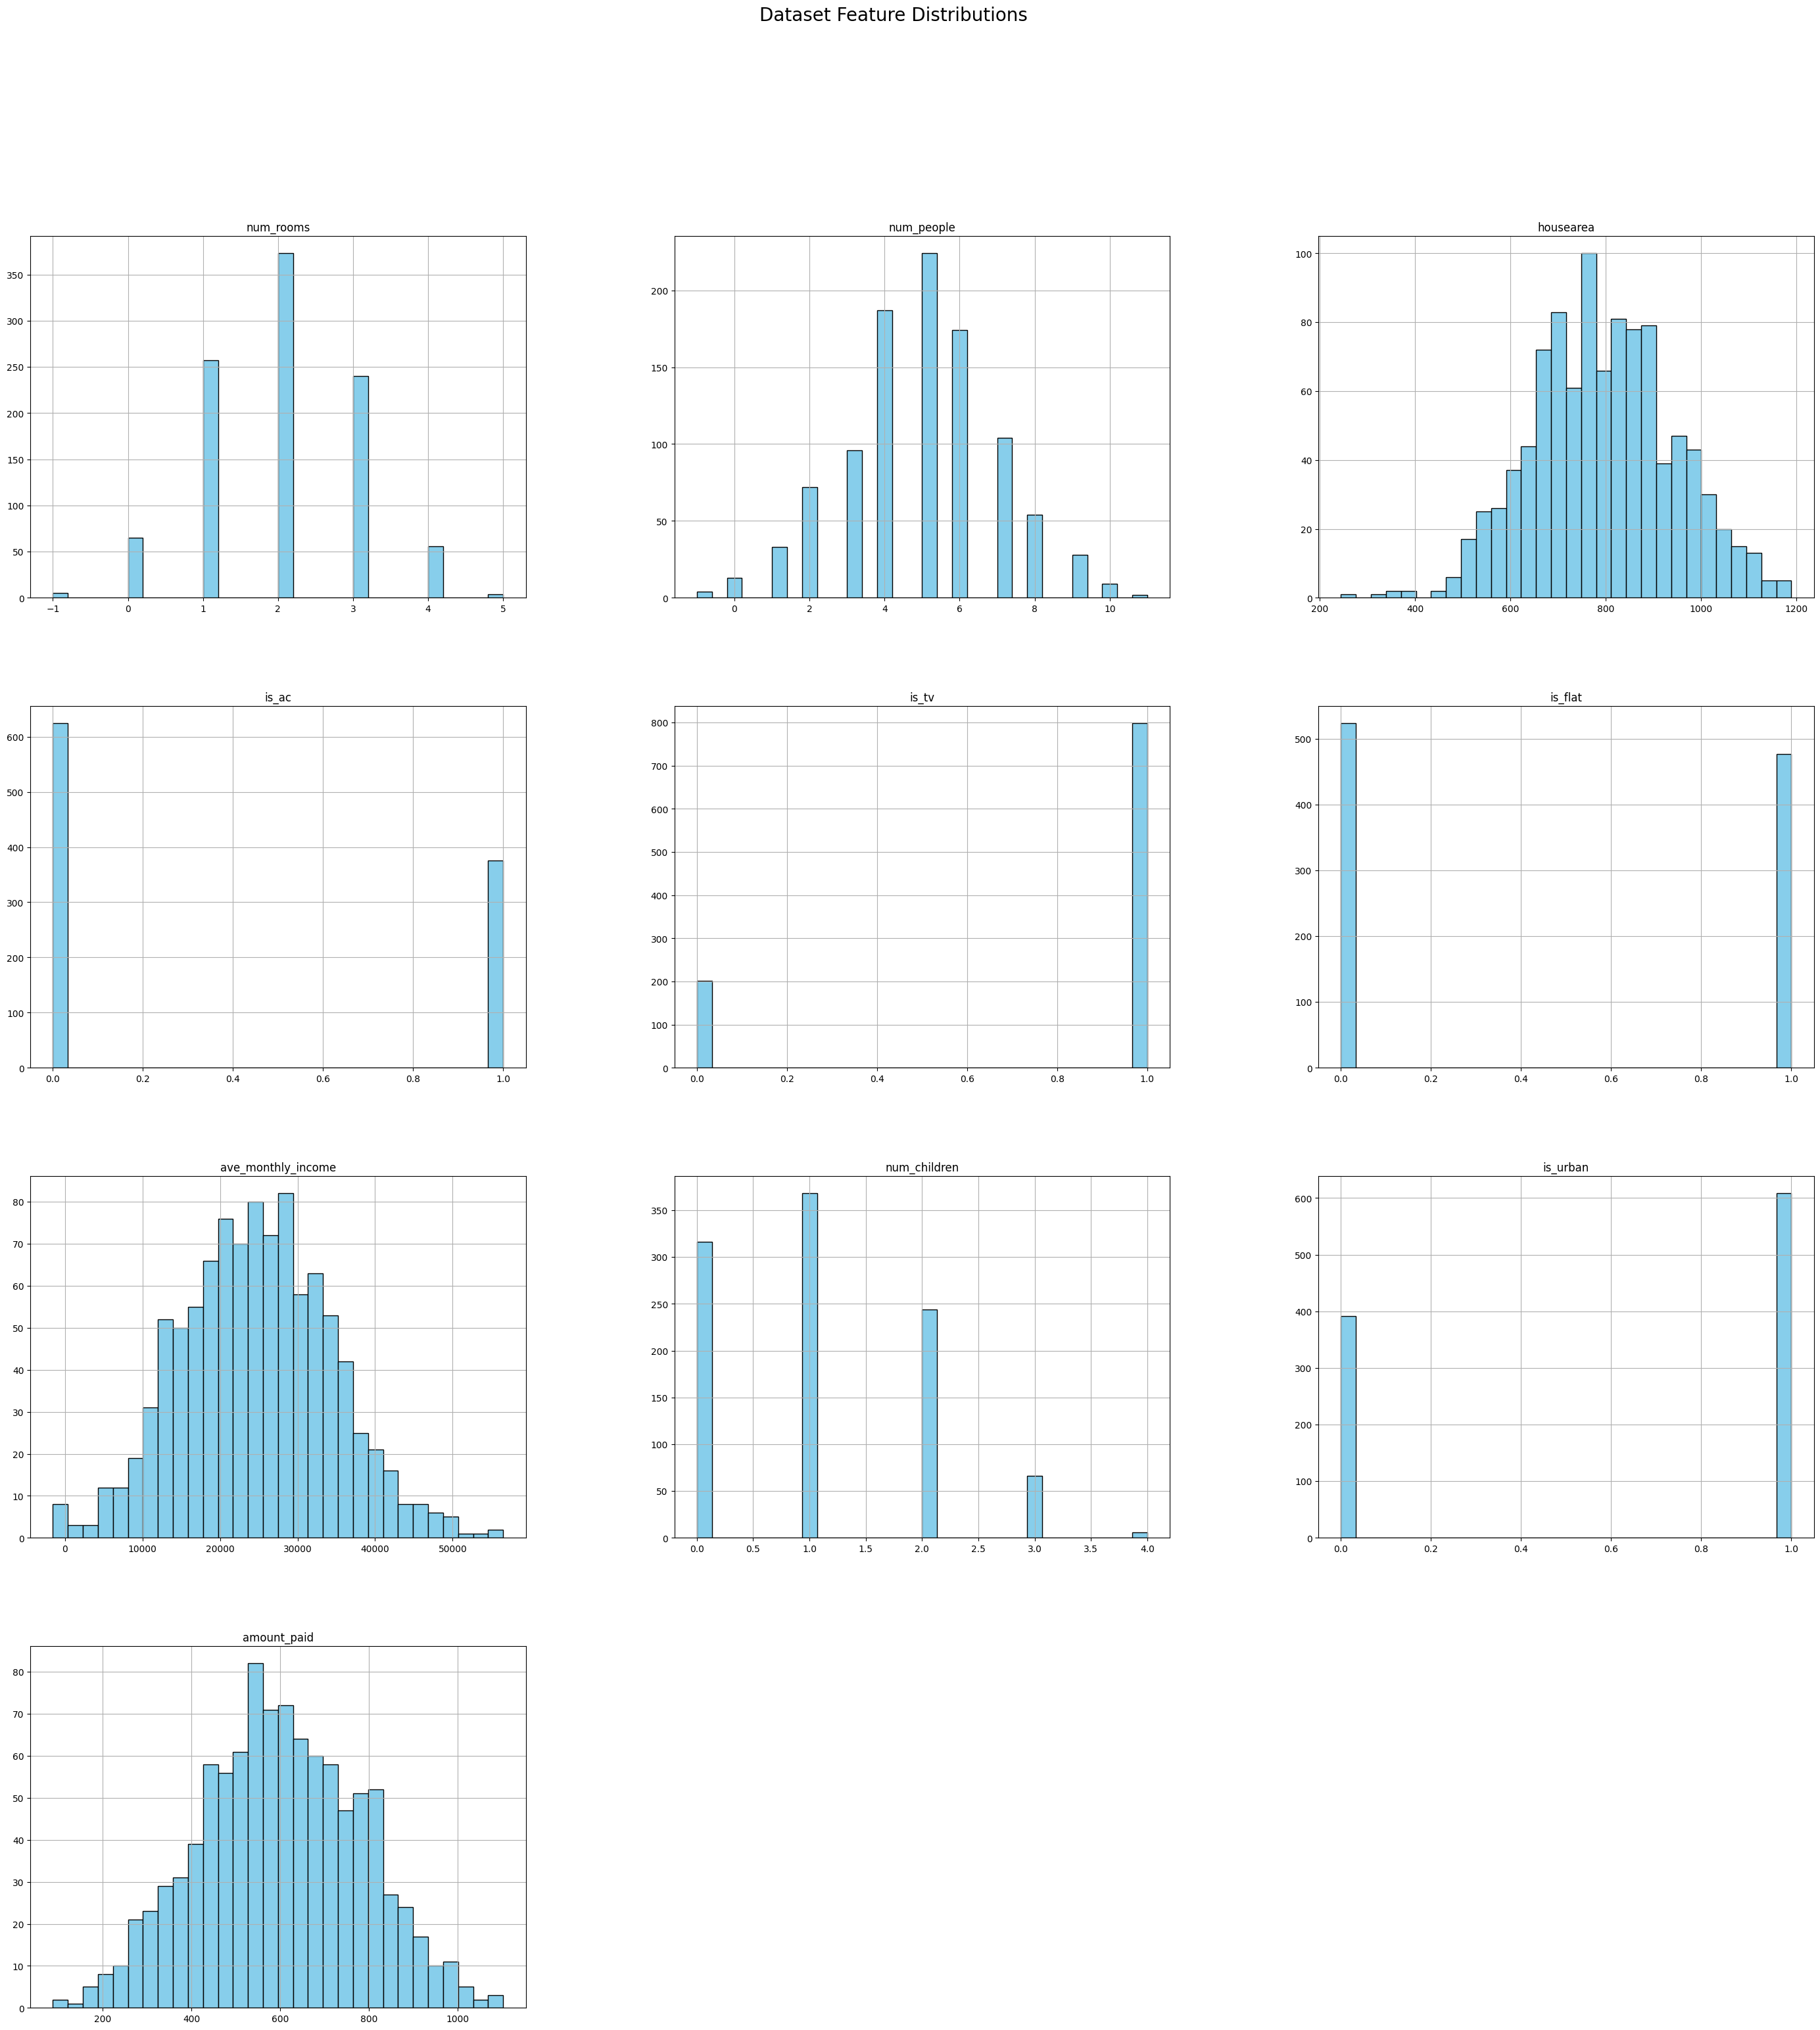

In [10]:
# Histogram for all features
data.hist(figsize=(35, 35), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Dataset Feature Distributions', fontsize=20)
plt.show()


In [11]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"R² Score: {r2_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")


Linear Regression Metrics:
R² Score: 0.9999994362016347
Mean Absolute Error (MAE): 0.07773328130097608
Root Mean Squared Error (RMSE): 0.0975290464960002


In [12]:
# SVM Regressor
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Metrics:")
print(f"R² Score: {r2_svm}")
print(f"Mean Absolute Error (MAE): {mae_svm}")
print(f"Root Mean Squared Error (RMSE): {rmse_svm}")


SVM Metrics:
R² Score: 0.24378823816737072
Mean Absolute Error (MAE): 89.70507889979308
Root Mean Squared Error (RMSE): 112.95196381586669


In [13]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display metrics
print("Random Forest Metrics:")
print(f"R² Score: {r2_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")

Random Forest Metrics:
R² Score: 0.8445988311470158
Mean Absolute Error (MAE): 40.177080494230346
Root Mean Squared Error (RMSE): 51.20344866411072


In [14]:
# KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Metrics:")
print(f"R² Score: {r2_knn}")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")


KNN Metrics:
R² Score: 0.77901038453659
Mean Absolute Error (MAE): 48.86073406351671
Root Mean Squared Error (RMSE): 61.060169455816194


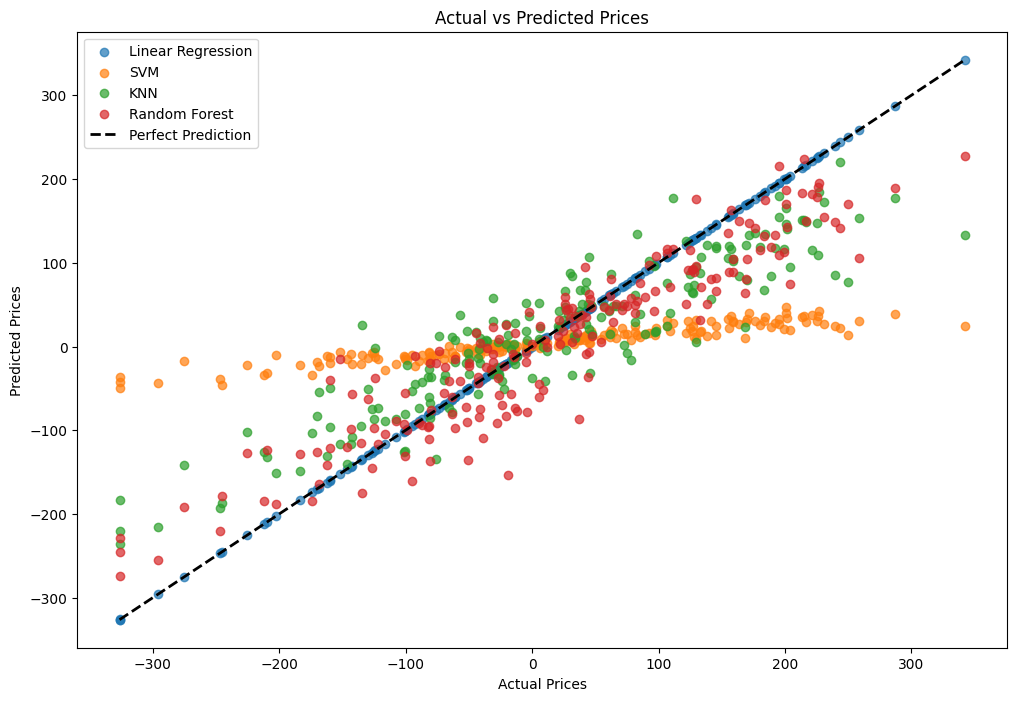

In [16]:
# Visualizing Actual vs Predicted for all models
plt.figure(figsize=(12, 8))

# Linear Regression
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7)

# SVM
plt.scatter(y_test, y_pred_svm, label='SVM', alpha=0.7)

# KNN
plt.scatter(y_test, y_pred_knn, label='KNN', alpha=0.7)

# Random Forest
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.7)

# Perfect Prediction Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


In [17]:
# Summary of metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'KNN', 'Random Forest'],
    'R² Score': [r2_lr, r2_svm, r2_knn, r2_rf],
    'MAE': [mae_lr, mae_svm, mae_knn, mae_rf],
    'RMSE': [rmse_lr, rmse_svm, rmse_knn, rmse_rf]
})

print("Model Performance Summary:")
print(results)


Model Performance Summary:
               Model  R² Score        MAE        RMSE
0  Linear Regression  0.999999   0.077733    0.097529
1                SVM  0.243788  89.705079  112.951964
2                KNN  0.779010  48.860734   61.060169
3      Random Forest  0.844599  40.177080   51.203449
